In [1]:
import pandas as pd
from variants_compare import VariantsCompare
from pm4py.objects.conversion.log import converter as log_converter
from algorithm_ranking import MeasurementsVisualizer, MeasurementsManager, RankVariantsDFGTr, RankVariantsSort2
import random
from am4pa.data_proccessing import CaseDurationsManager

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
ct = pd.read_csv('saved-data/GLS_1000_100/ct_competing_variants.csv', index_col=[0])
alg_list = list(ct['case:concept:name'])
alg_list

['algorithm8',
 'algorithm2',
 'algorithm17',
 'algorithm53',
 'algorithm54',
 'algorithm58',
 'algorithm62',
 'algorithm66',
 'algorithm99',
 'algorithm88']

In [3]:
et = pd.read_csv('saved-data/GLS_1000_100/run_times_competing_1.csv',sep=';')
et['case:variant'] = et['case:concept:name'].apply(lambda row: row.split('_')[0])
et = et[et['case:variant'].isin(alg_list)]
cm = CaseDurationsManager()
cm.add_case_durations(et)

In [4]:
mv = MeasurementsVisualizer(cm.get_alg_measurements(), alg_list)

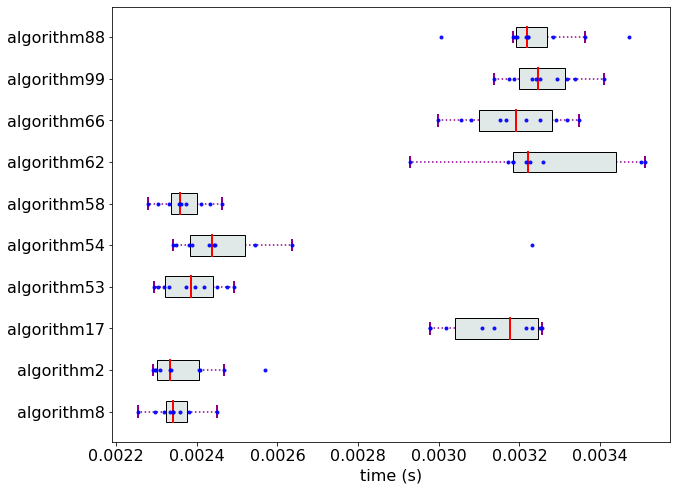

In [5]:
fig = mv.show_measurements_boxplots(scale=0.8,tick_size=16)

In [6]:
fig.savefig("gls-1000-100-box.pdf", format="pdf", bbox_inches="tight")

In [7]:
ct

,case:concept:name,case:flops,case:num_kernels,case:rank:q75-q25
0,algorithm8,445000000.0,8,0
1,algorithm2,445000000.0,8,0
2,algorithm17,447000000.0,8,1
3,algorithm53,455000000.0,8,0
4,algorithm54,455000000.0,8,0
5,algorithm58,455000000.0,8,0
6,algorithm62,456000000.0,10,1
7,algorithm66,456000000.0,10,1
8,algorithm99,466000000.0,10,1
9,algorithm88,466000000.0,10,1


In [8]:
rv = RankVariantsSort2(cm.get_alg_measurements(), alg_list)

In [9]:
ranks = rv.rank_variants()
ranks

,case:concept:name,case:rank:q75-q25
0,algorithm8,0
1,algorithm2,0
2,algorithm53,0
3,algorithm54,0
4,algorithm58,0
5,algorithm17,1
6,algorithm62,1
7,algorithm66,1
8,algorithm99,1
9,algorithm88,1


In [10]:
def clean_concept(name):
    splits = name.split('=')
    if len(splits) > 1:
        return splits[-1].strip()
    return splits[0].strip()

et['concept:name'] = et['concept:name'].apply(lambda row: clean_concept(row))

In [57]:
xes_log = log_converter.apply(et)
best = ranks[ranks['case:rank:q75-q25']==0]['case:concept:name'].tolist()
worst = ranks[ranks['case:rank:q75-q25']==1]['case:concept:name'].tolist()
worst = ['algorithm17']

In [58]:
activity_key = 'concept:name'
#activity_key = 'concept:operation'

In [59]:
vc = VariantsCompare(xes_log,best,worst,activity_key=activity_key, variants_id_key="variant")

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


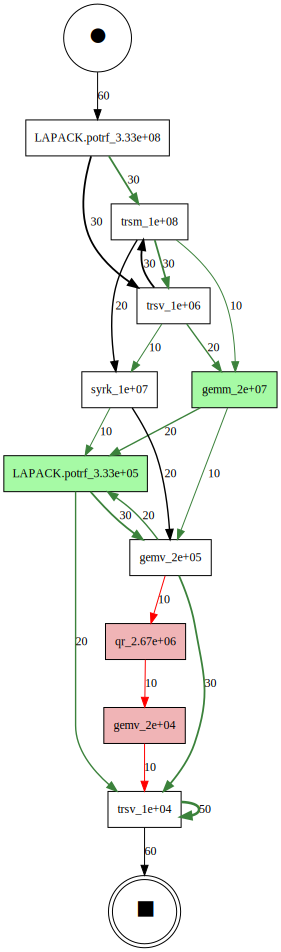

In [60]:
gviz = vc.get_dfg_minus_best_worst(orientation='TD')
gviz

In [61]:
gviz.render(filename='gviz/gls-1000-100-f', format='pdf')

'gviz/gls-1000-100-f.pdf'

In [54]:
best = ['algorithm2', 'algorithm8']
worst = ['algorithm53','algorithm58' ]
vc = VariantsCompare(xes_log,best,worst,activity_key=activity_key, variants_id_key="variant")

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


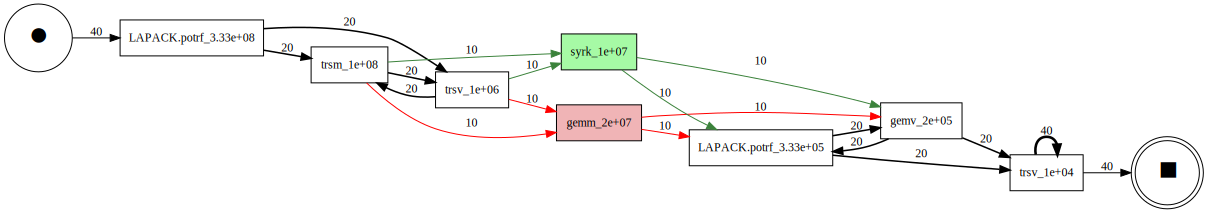

In [55]:
gviz = vc.get_dfg_minus_best_worst(orientation='LR')
gviz

In [56]:
gviz.render(filename='gviz/gls-1000-100', format='svg')

'gviz/gls-1000-100.svg'

In [62]:
best = ['algorithm58','algorithm53']
worst = ['algorithm54' ]
vc = VariantsCompare(xes_log,best,worst,activity_key=activity_key, variants_id_key="variant")

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


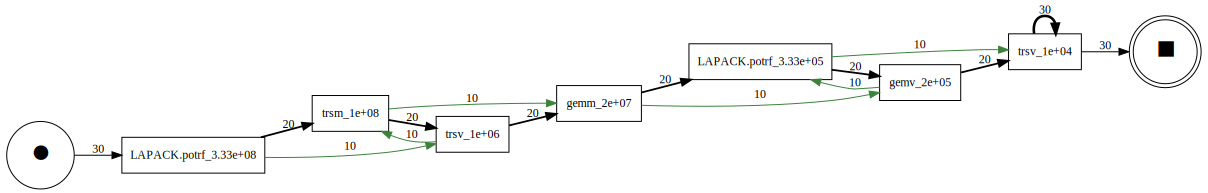

In [64]:
gviz = vc.get_dfg_minus_best_worst(orientation='LR')
gviz

In [65]:
gviz.render(filename='gviz/gls-1000-100-g', format='pdf')

'gviz/gls-1000-100-g.pdf'

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


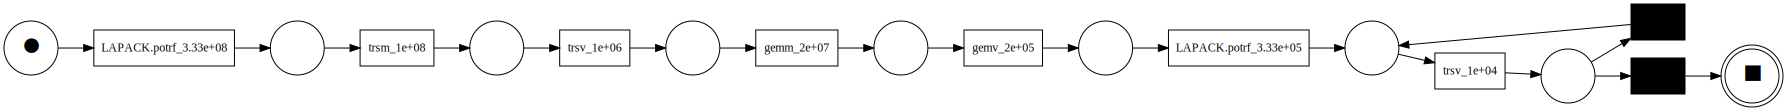

In [21]:
vc.show_petrinet(variants_list=['algorithm58'])